In [4]:
### Mohammadreza Zamani (10869960) – Asal Abbasnejadfard (10974178)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
read_sensor = './sensor_read.csv'

In [6]:
df = pd.read_csv(read_sensor, sep=',')

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Diference'] = df['Timestamp'].diff().dt.total_seconds()

df['Time'] = np.cumsum(df['Diference'])

<ipython-input-7-9df75373eb94>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [8]:
filtered_values = np.where(df['Data']<340)

In [9]:
filtered_values = np.where(df['Data']>460)

In [10]:
df['Data'] = df['Data'] *1e-3

In [11]:
# Get high power data
df_high = df[df['Data']>460 * 1e-3]

# Get low power data
df_low = df[df['Data']<340 * 1e-3]

In [12]:
# Compute average power values

df_high_av = np.mean(df_high['Data'], axis = 0)
print('Average power of high power data:', df_high_av, "W")

df_low_av = np.mean(df_low['Data'], axis = 0)
print('Average power of low power data:', df_low_av, "W")

df_av = np.mean(df['Data'], axis = 0)
print('Average power:', df_av, "W")


Average power of high power data: 0.4667448062015504 W
Average power of low power data: 0.3315857823129252 W
Average power: 0.3949029681978799 W


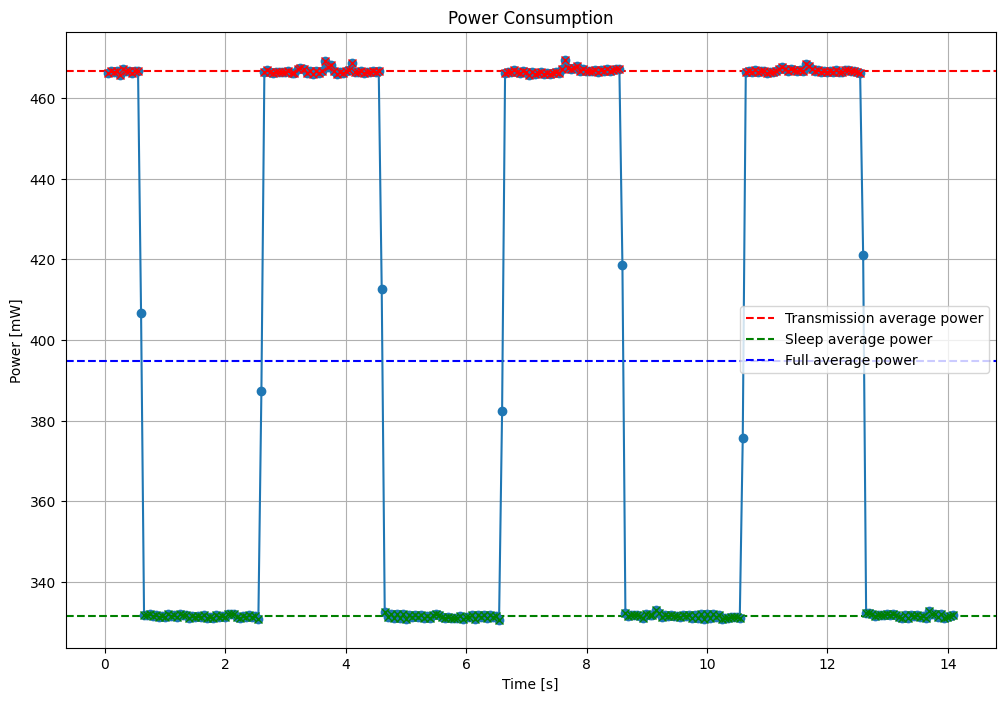

In [13]:
plt.figure(figsize=(12, 8))

plt.axhline(y=df_high_av * 1e3, color='r', linestyle='--', label='Transmission average power')
plt.axhline(y=df_low_av  * 1e3, color='g', linestyle='--', label='Sleep average power')
plt.axhline(y=df_av  * 1e3, color='b', linestyle='--', label='Full average power')

plt.plot(df['Time'], df['Data']  * 1e3, marker='o', linestyle='-')

plt.plot(df_high['Time'], df_high['Data'] * 1e3,color = 'r', marker='x', linestyle='')
plt.plot(df_low['Time'], df_low['Data']  * 1e3,color = 'g', marker='x', linestyle='')

plt.title('Power Consumption')
plt.xlabel('Time [s]')
plt.ylabel('Power [mW]')
plt.grid(True)
plt.legend(loc= 'center right')

plt.show()

In [14]:
energy_bat = 19960 # In Joules

In [15]:
duration_low_1 = (df['Time'][51] - df['Time'][13])
duration_low_2 = (df['Time'][131] - df['Time'][93])
duration_low_3 = (df['Time'][211] - df['Time'][173])
duration_low = np.mean([duration_low_1, duration_low_2, duration_low_3])

energy_low_1 = duration_low_1 * df_low_av # expressed in uJ (1mW * 1ms)
energy_low_2 = duration_low_2 * df_low_av # expressed in uJ (1mW * 1ms)
energy_low_3 = duration_low_3 * df_low_av # expressed in uJ (1mW * 1ms)
energy_low = np.mean([energy_low_1, energy_low_2, energy_low_3])

print("Sleep state duration per cycle: ", duration_low, "s; ", "Energy consumed:" , energy_low, "W")

Sleep state duration per cycle:  1.8992076666666637 s;  Energy consumed: 0.629750259926371 W


In [16]:
duration_high_1 = (df['Time'][91] - df['Time'][53])
duration_high_2 = (df['Time'][171] - df['Time'][133])
duration_high_3 = (df['Time'][251] - df['Time'][213])
duration_high = np.mean([duration_high_1, duration_high_2, duration_high_3])

energy_high_1 = duration_high_1 * df_high_av # expressed in uJ (1mW * 1ms)
energy_high_2 = duration_high_2 * df_high_av # expressed in uJ (1mW * 1ms)
energy_high_3 = duration_high_2 * df_high_av # expressed in uJ (1mW * 1ms)

energy_high = np.mean([energy_high_1, energy_high_2, energy_high_3])

print("Read sensor state duration per cycle: ", duration_high, "s; Energy consumed:" , energy_high, "W")

Read sensor state duration per cycle:  1.8991140000000002 s; Energy consumed: 0.8863695460746243 W


In [17]:
cycle_duration = duration_high + duration_low
energy_cycle = energy_low + energy_high

print("Energy used per cycle : ",energy_cycle, "Joules")
print("Energy stored by the battery: ", energy_bat, "Joules")
print("Number of cycles of the battery: ", int(energy_bat//energy_cycle), "cycles")
print("Time to download the battery: ", (energy_bat/energy_cycle * cycle_duration)/3600, "hours")


Energy used per cycle :  1.5161198060009953 Joules
Energy stored by the battery:  19960 Joules
Number of cycles of the battery:  13165 cycles
Time to download the battery:  13.890448089660484 hours
